In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('trainreal.csv')
df_test=pd.read_csv('testreal.csv')

In [3]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


2.Figure out the primary key and look for the requirement of indexing

In [5]:
len(set(df_train['UID']).intersection(set(df_test['UID'])))

123

In [6]:
# So here 123 common UID in train and test data.

In [7]:
df_train.dtypes

UID              int64
BLOCKID        float64
SUMLEVEL         int64
COUNTYID         int64
STATEID          int64
                ...   
pct_own        float64
married        float64
married_snp    float64
separated      float64
divorced       float64
Length: 80, dtype: object

In [8]:
df_train.describe(include='O')

,state,state_ab,city,place,type,primary
count,27321,27321,27321,27321,27321,27321
unique,52,52,6916,9912,6,1
top,California,CA,Chicago,New York City,City,tract
freq,2926,2926,294,490,15237,27321


3.Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.


In [9]:
#This flag will help us split the data back later
df_train['split']= 'Train'
df_test['split']= 'Test'

In [10]:
df_combined=df_train.append(df_test, ignore_index=True)
df_combined.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train


In [11]:
df_combined.shape

(39030, 81)

In [12]:
df_combined.isnull().sum()

UID                0
BLOCKID        39030
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
married          275
married_snp      275
separated        275
divorced         275
split              0
Length: 81, dtype: int64

In [13]:
# BlOCKID is completly missing or Null in both train and test data. So we will drop BLOCKID feature.
df_combined.drop(columns =['BLOCKID'], axis=1, inplace=True)

In [14]:
df_combined.isna().sum()/len(df_combined)*100


UID            0.000000
SUMLEVEL       0.000000
COUNTYID       0.000000
STATEID        0.000000
state          0.000000
                 ...   
married        0.704586
married_snp    0.704586
separated      0.704586
divorced       0.704586
split          0.000000
Length: 80, dtype: float64

In [15]:
# Missing value greater than zero
col_check=df_combined.isna().sum().to_frame().reset_index()
null_col=col_check[col_check[0]>0]['index'].tolist()
null_col

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [16]:
#If the feature have less than 8 unique value then I am consdering as categorical else it will be continuous
for i in null_col:
    print(i)
    if df_combined[i].nunique()>8:      #Continuous data
        df_combined[i].fillna(df_combined[i].median(),inplace=True)    #Bcz median is not impacted by outlier
    else:df_combined[i].fillna(df_combined[i].mode()[0],inplace=True)  #Categorical data

rent_mean
rent_median
rent_stdev
rent_sample_weight
rent_samples
rent_gt_10
rent_gt_15
rent_gt_20
rent_gt_25
rent_gt_30
rent_gt_35
rent_gt_40
rent_gt_50
hi_mean
hi_median
hi_stdev
hi_sample_weight
hi_samples
family_mean
family_median
family_stdev
family_sample_weight
family_samples
hc_mortgage_mean
hc_mortgage_median
hc_mortgage_stdev
hc_mortgage_sample_weight
hc_mortgage_samples
hc_mean
hc_median
hc_stdev
hc_samples
hc_sample_weight
home_equity_second_mortgage
second_mortgage
home_equity
debt
second_mortgage_cdf
home_equity_cdf
debt_cdf
hs_degree
hs_degree_male
hs_degree_female
male_age_mean
male_age_median
male_age_stdev
male_age_sample_weight
male_age_samples
female_age_mean
female_age_median
female_age_stdev
female_age_sample_weight
female_age_samples
pct_own
married
married_snp
separated
divorced


In [17]:
df_combined.isna().sum()/len(df_combined)*100


UID            0.0
SUMLEVEL       0.0
COUNTYID       0.0
STATEID        0.0
state          0.0
              ... 
married        0.0
married_snp    0.0
separated      0.0
divorced       0.0
split          0.0
Length: 80, dtype: float64

In [18]:
# Drop duplicate observations
df_combined.drop_duplicates(inplace=True)
df_combined.shape

(38838, 80)

In [19]:
# As we have seen above we have 123 unique UID which are common in both train and test data. so duplicate UID removing them.
df_combined.drop_duplicates(subset=['UID'],inplace=True)
df_combined.shape

(38715, 80)

In [20]:
top_2500_loc=df_train[(df_train['second_mortgage']<0.50) & 
                      (df_train['pct_own']>0.10) ].sort_values(by='second_mortgage', ascending=False).head(2500)

In [21]:
top_2500_loc=top_2500_loc[['state','city','state_ab','place','lat','lng']]
top_2500_loc.head()

,state,city,state_ab,place,lat,lng
11980,Massachusetts,Worcester,MA,Worcester City,42.254262,-71.800347
26018,New York,Corona,NY,Harbor Hills,40.751809,-73.853582
7829,Maryland,Glen Burnie,MD,Glen Burnie,39.127273,-76.635265
2077,Florida,Tampa,FL,Egypt Lake-leto,28.029063,-82.495395
1701,Illinois,Chicago,IL,Lincolnwood,41.967289,-87.652434


In [22]:
!pip install geopandas
import warnings
warnings.filterwarnings('ignore')

In [23]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(top_2500_loc, geometry=gpd.points_from_xy(x=top_2500_loc.lng, y=top_2500_loc.lat))
gdf

,state,city,state_ab,place,lat,lng,geometry
11980,Massachusetts,Worcester,MA,Worcester City,42.254262,-71.800347,POINT (-71.80035 42.25426)
26018,New York,Corona,NY,Harbor Hills,40.751809,-73.853582,POINT (-73.85358 40.75181)
7829,Maryland,Glen Burnie,MD,Glen Burnie,39.127273,-76.635265,POINT (-76.63526 39.12727)
2077,Florida,Tampa,FL,Egypt Lake-leto,28.029063,-82.495395,POINT (-82.49540 28.02906)
1701,Illinois,Chicago,IL,Lincolnwood,41.967289,-87.652434,POINT (-87.65243 41.96729)
...,...,...,...,...,...,...,...
17914,North Carolina,Raleigh,NC,Raleigh City,35.757135,-78.704288,POINT (-78.70429 35.75713)
5478,California,Marina Del Rey,CA,Marina Del Rey,33.983204,-118.466139,POINT (-118.46614 33.98320)
25642,Maryland,Baltimore,MD,Lochearn,39.353095,-76.733315,POINT (-76.73331 39.35310)
26671,Pennsylvania,Philadelphia,PA,Philadelphia City,40.039070,-75.125135,POINT (-75.12514 40.03907)


b. Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [24]:
#Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage
df_combined['bad_debt'] = df_combined['second_mortgage'] + df_combined['home_equity'] - df_combined['home_equity_second_mortgage']
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426


c. Create pie charts to show overall debt and bad debt

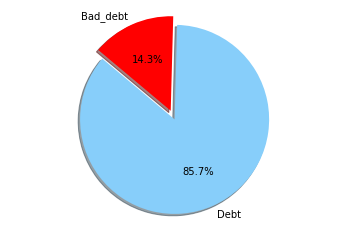

In [25]:
import matplotlib.pyplot as plt
labels = 'Debt', 'Bad_debt'
sizes = [df_combined['debt'].mean()*100, df_combined['bad_debt'].mean()*100]
colors = [ 'lightskyblue','red']
explode = (0.1, 0)  # explode 1st slice

#Plot
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

d. Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [26]:
df_combined['good_debt']=df_combined['debt']-df_combined['bad_debt']
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512


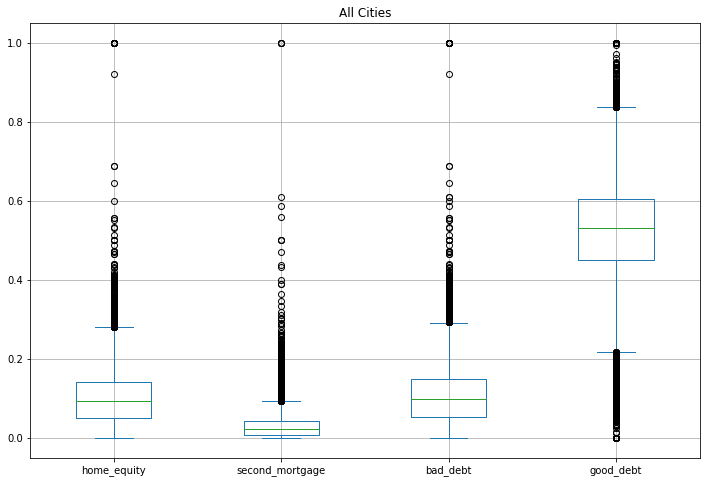

In [27]:
all_cities = df_combined[['home_equity','second_mortgage','bad_debt', 'good_debt']]
all_cities.plot.box(figsize=(12,8),grid=True)
plt.title('All Cities')
plt.show()

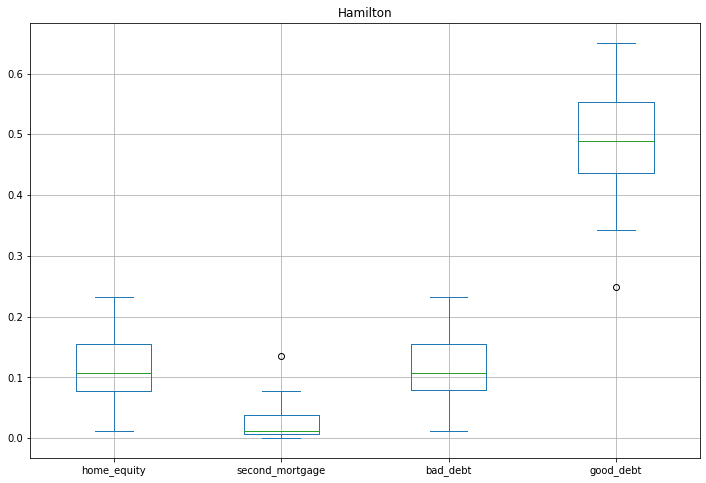

In [28]:
hamilton = df_combined[df_combined['city']=='Hamilton']
hamilton = hamilton[['home_equity','second_mortgage','bad_debt', 'good_debt']]
hamilton.plot.box(figsize=(12,8),grid=True)
plt.title('Hamilton')
plt.show()

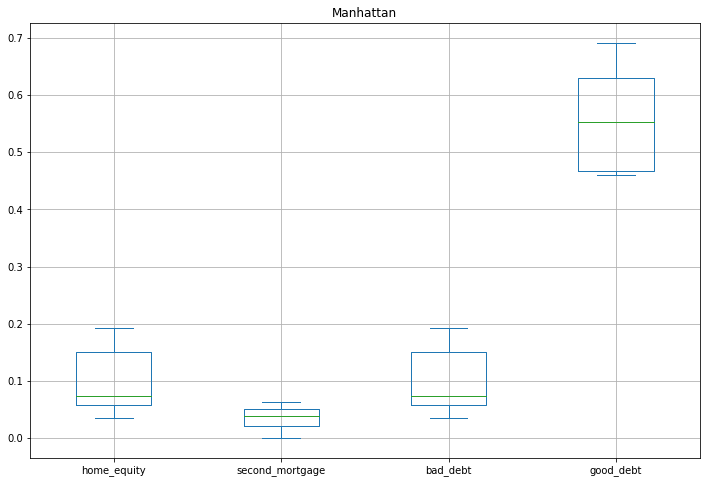

In [29]:
Manhattan = df_combined[df_combined['city']=='Manhattan']
Manhattan = Manhattan[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Manhattan.plot.box(figsize=(12,8),grid=True)
plt.title('Manhattan')
plt.show()

e. Create a collated income distribution chart for family income, house hold income, and remaining income

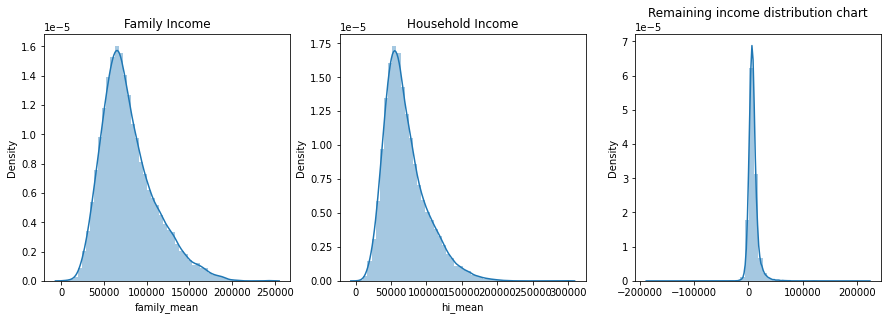

In [30]:
import seaborn as sns
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(df_train['family_mean'])
plt.title('Family Income')
plt.subplot(2,3,2)
sns.distplot(df_train['hi_mean'])
plt.title('Household Income')
plt.subplot(2,3,3)
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

Project Task: Week 2 Exploratory Data Analysis (EDA):

Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):
a. Use pop and ALand variables to create a new field called population density

In [31]:
df_combined['population_density'] = df_combined['pop']/df_combined['ALand']


In [32]:
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555,0.000026
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581,0.001687
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972,0.000099
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628,0.002442
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512,0.002207


b. Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age 


In [33]:
df_combined['median_age']=((df_combined['male_age_median'] * df_combined['male_pop'])+(df_combined['female_age_median']*df_combined['female_pop']))/(df_combined['male_pop']+df_combined['female_pop'])


In [34]:
df_combined.head()


,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555,0.000026,44.667430
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581,0.001687,34.722748
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972,0.000099,41.774472
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628,0.002442,49.879012
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512,0.002207,21.965629


c. Visualize the findings using appropriate chart type


<AxesSubplot: xlabel='population_density', ylabel='Count'>

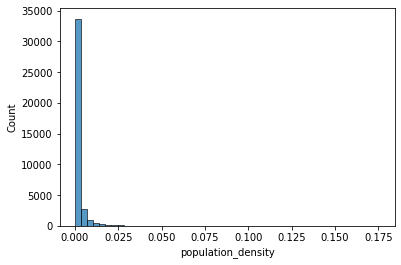

In [35]:
sns.histplot(df_combined['population_density'], bins=50)


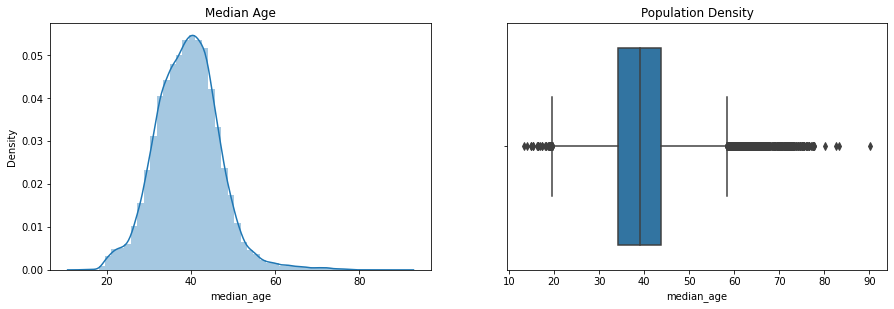

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df_combined['median_age'])
plt.title('Median Age')
plt.subplot(2,2,2)
sns.boxplot(df_combined['median_age'])
plt.title('Population Density')
plt.show()

2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.


In [37]:
df_combined['pop_bins']=pd.cut(df_combined['pop'],bins=5,labels=['very low','low','medium','high','very high'])
df_combined['pop_bins'].value_counts()

very low     38350
low            348
medium          12
high             4
very high        1
Name: pop_bins, dtype: int64

a. Analyze the married, separated, and divorced population for these population brackets 


In [38]:
df_combined.groupby(by='pop_bins')[['married','separated','divorced']].count()


,married,separated,divorced
pop_bins,,,
very low,38350,38350,38350
low,348,348,348
medium,12,12,12
high,4,4,4
very high,1,1,1


In [39]:
df_combined.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])


married           separated            divorced         
               mean    median      mean    median      mean   median
pop_bins                                                            
very low   0.508000  0.526210  0.019127  0.013580  0.100325  0.09510
low        0.589247  0.601815  0.014929  0.010255  0.075192  0.06934
medium     0.617047  0.605765  0.011203  0.007745  0.071870  0.06909
high       0.629132  0.675095  0.012372  0.007340  0.060562  0.05987
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.03036

b. Visualize using appropriate chart type


<Figure size 864x576 with 0 Axes>

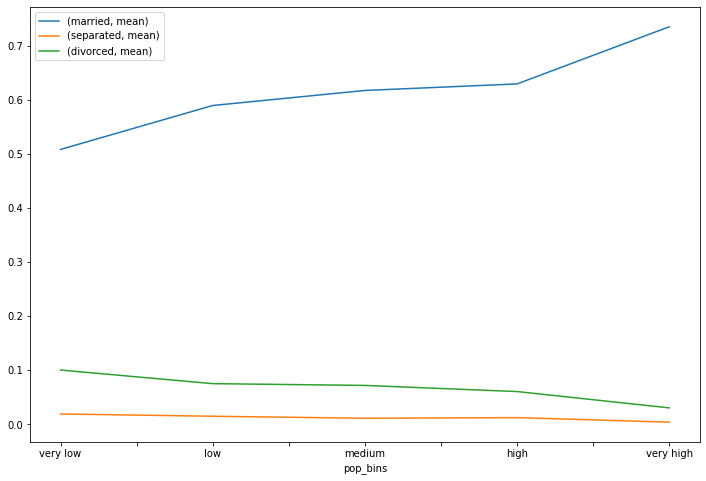

In [40]:
plt.figure(figsize=(12,8))
pop_bin_married=df_combined.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(12,8))
plt.legend(loc='best')
plt.show()

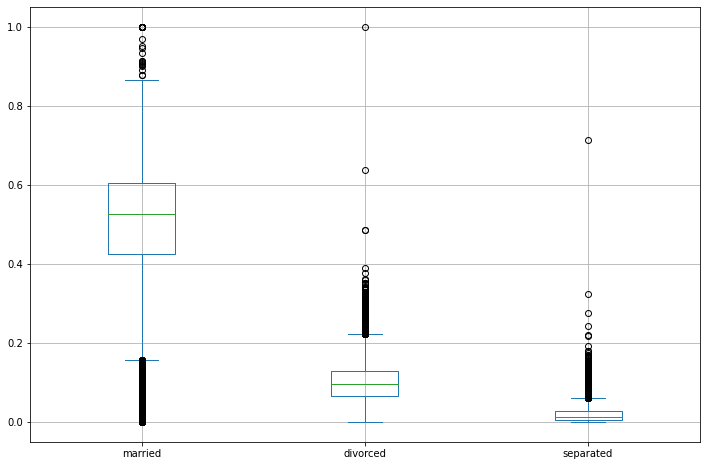

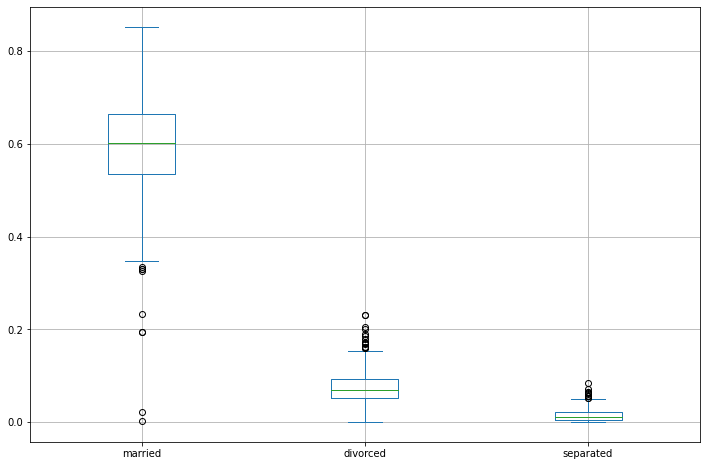

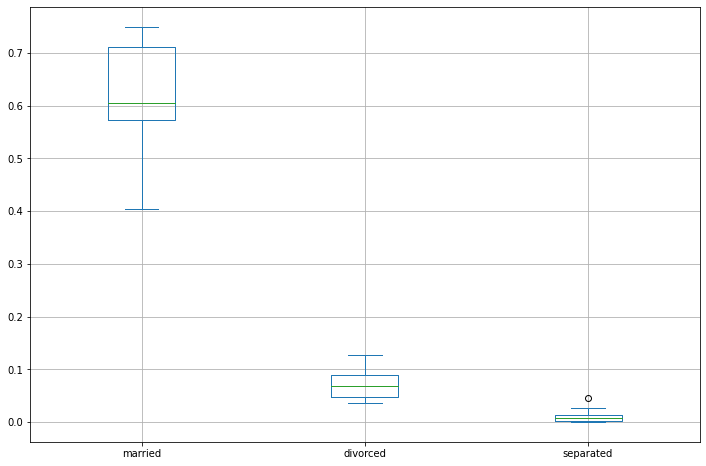

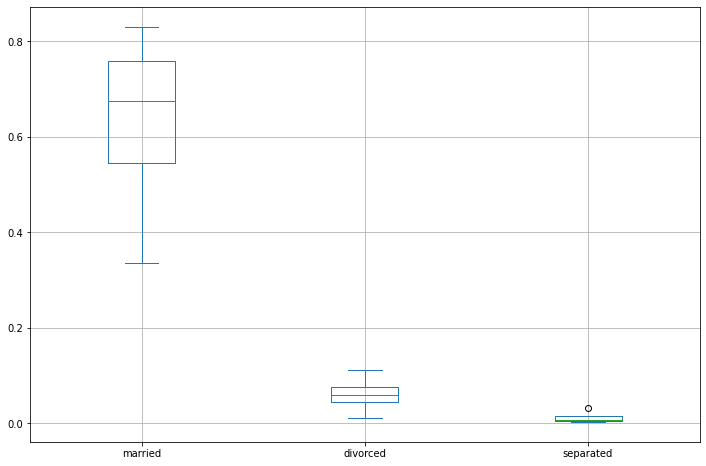

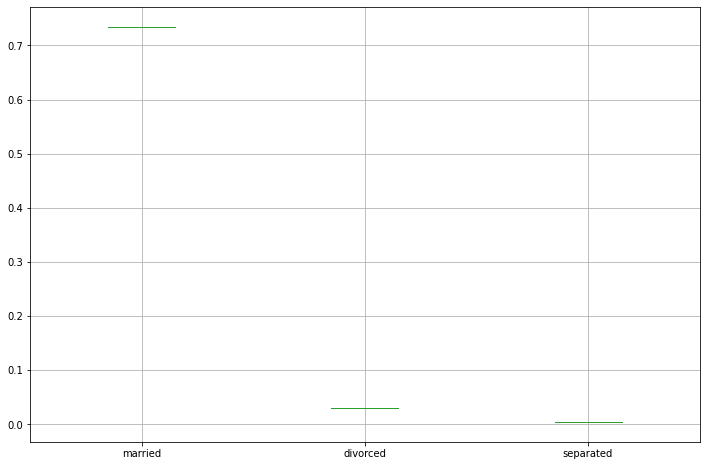

In [41]:
df_combined.groupby(by='pop_bins')[['married','divorced', 'separated']].plot.box(figsize=(12,8),grid='True')
plt.show()

3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.


In [42]:
rent_state_mean = df_combined.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,765.872557
Alaska,1190.093590
Arizona,1084.510940
Arkansas,716.544987
California,1466.020465


In [43]:
income_state_mean=df_combined.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,65311.510962
Alaska,91911.137520
Arizona,73014.068487
Arkansas,64234.705963
California,87711.550734


In [44]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']*100
rent_perc_of_income.head(10)

state
Alabama                 1.172646
Alaska                  1.294831
Arizona                 1.485345
Arkansas                1.115511
California              1.671411
Colorado                1.359697
Connecticut             1.272141
Delaware                1.311538
District of Columbia    1.357450
Florida                 1.576101
Name: mean, dtype: float64

In [45]:
sum(df_combined['rent_mean'])/sum(df_combined['family_mean'])


0.013351543786573208

4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

<AxesSubplot: >

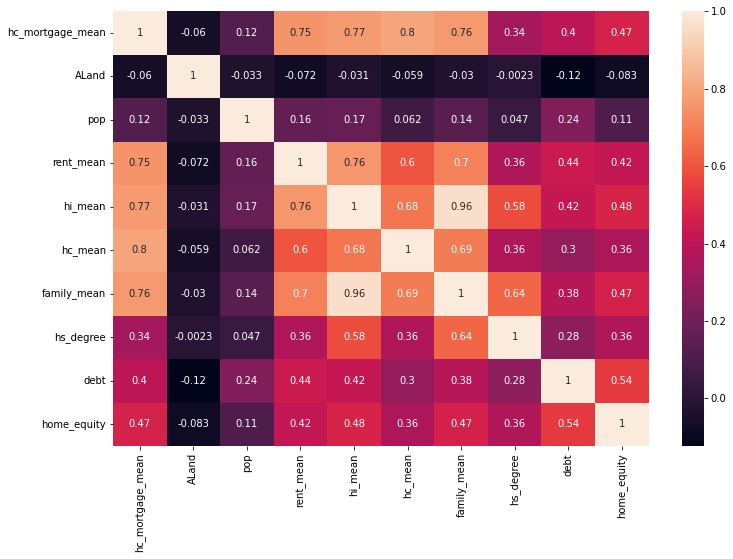

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_combined[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']].corr(),annot=True)

In [53]:
train = df_combined[df_combined['split'] == 'Train']
test = df_combined[df_combined['split'] == 'Test']

Project Task: Week 3
Data Pre-processing:

The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables.
Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. Following are the list of latent variables:
Highschool graduation rates
Median population age
Second mortgage statistics
Percent own
Bad debt expense

In [47]:
!pip install factor_analyzer

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42071 sha256=5f5a8a836546258c5a5ce04e1a4e8917448dfcbf0537ba13dc41a2cc86a1e226
  Stored in directory: c:\users\91762\appdata\local\pip\cache\wheels\6d\32\bd\460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor-analyzer
  Attempting uninstall: filelock
    Found existing installation: filelock 3.6.0
    Uninstalling filelock-3.6.0:
      Successfully uninstalled filelock-3.6.0


In [48]:
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [49]:
df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
UID,27321.0,257331.996303,21343.859725,220342.0,238816.000000,257220.000000,275818.000000,294334.00000
BLOCKID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUMLEVEL,27321.0,140.000000,0.000000,140.0,140.000000,140.000000,140.000000,140.00000
COUNTYID,27321.0,85.646426,98.333097,1.0,29.000000,63.000000,109.000000,840.00000
STATEID,27321.0,28.271806,16.392846,1.0,13.000000,28.000000,42.000000,72.00000
...,...,...,...,...,...,...,...,...
pct_own,27053.0,0.640434,0.226640,0.0,0.502780,0.690840,0.817460,1.00000
married,27130.0,0.508300,0.136860,0.0,0.425102,0.526665,0.605760,1.00000
married_snp,27130.0,0.047537,0.037640,0.0,0.020810,0.038840,0.065100,0.71429
separated,27130.0,0.019089,0.020796,0.0,0.004530,0.013460,0.027488,0.71429


Project Task: Week 4
Data Modeling :

Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.
a. Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step. b. Run another model at State level. There are 52 states in USA. c. Keep below considerations while building a linear regression model. Data Modeling :
Variables should have significant impact on predicting Monthly mortgage and owner costs
Utilize all predictor variable to start with initial hypothesis
R square of 60 percent and above should be achieved
Ensure Multi-collinearity does not exist in dependent variables
Test if predicted variable is normally distributed

In [54]:
train.columns


Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

In [55]:
train['type'].unique()


array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [56]:
type_dict={'type':{'City':1, 'Urban':2, 'Town':3, 'CDP':4, 'Village':5, 'Borough':6}}
train.replace(type_dict,inplace=True)

In [57]:
test.replace(type_dict,inplace=True)


In [58]:
train['type'].unique()


array([1, 2, 3, 4, 5, 6], dtype=int64)

In [59]:
test['type'].unique()


array([4, 1, 6, 3, 5, 2], dtype=int64)

In [60]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean','second_mortgage', 'home_equity', 'debt','hs_degree',
              'pct_own', 'married','separated', 'divorced']

In [61]:
X_train = train[feature_cols]
y_train = train['hc_mortgage_mean']

In [62]:
X_test = test[feature_cols]
y_test = test['hc_mortgage_mean']

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [64]:
X_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
0,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,0.79046,0.57851,0.01240,0.08770
1,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,0.52483,0.34886,0.01426,0.09030
2,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,0.85331,0.64745,0.01607,0.10657
3,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,0.65037,0.47257,0.02021,0.10106
4,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,0.13046,0.12356,0.00000,0.03109


In [65]:
X_test.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
27321,163,26,48239,4,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,0.70252,0.28217,0.03813,0.14299
27322,1,23,4210,1,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,0.85128,0.64221,0.00000,0.13377
27323,15,42,14871,6,3944,65694.06582,0.01316,0.06497,0.45395,0.89238,0.81897,0.59961,0.01358,0.10026
27324,231,21,42633,1,2508,44156.38709,0.00995,0.01741,0.41915,0.60908,0.84609,0.56953,0.04694,0.12489
27325,355,48,78410,3,6230,123527.02420,0.00000,0.03440,0.63188,0.86297,0.79077,0.57620,0.00588,0.16379


In [66]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

a. Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.


In [67]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
y_pred= lr.predict(X_test_scaled)

In [69]:
r2_score(y_test,y_pred)


0.7381882934134452

In [70]:
mean_absolute_error(y_test, y_pred)


233.86965694140085

In [71]:
mean_squared_error(y_test, y_pred) 


103818.40486733473

In [72]:
np.sqrt(mean_squared_error(y_test,y_pred))


322.20863561880947

In [73]:
r2_score(y_train, lr.predict(X_train_scaled))


0.734344756627955

In [74]:
lr.coef_


array([ -28.50842455,  -21.7100607 ,  -22.98370175,  -57.43101333,
         -4.78426374,  558.7402445 ,   -0.55955638,   70.89657588,
         12.81271881, -113.18431746, -176.51983734,    8.10645154,
          5.24214879,  -55.79637445])

In [75]:
X_train.columns


Index(['COUNTYID', 'STATEID', 'zip_code', 'type', 'pop', 'family_mean',
       'second_mortgage', 'home_equity', 'debt', 'hs_degree', 'pct_own',
       'married', 'separated', 'divorced'],
      dtype='object')

b. Run another model at State level. There are 52 states in USA.

In [76]:
state = train['STATEID'].unique()
state

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10], dtype=int64)

In [77]:
for i in [11,1,29]:
    print("State ID-",i)
    
    X_train_nation = train[train['COUNTYID'] == i][feature_cols]
    y_train_nation = train[train['COUNTYID'] == i]['hc_mortgage_mean']
    
    X_test_nation = test[test['COUNTYID'] == i][feature_cols]
    y_test_nation = test[test['COUNTYID'] == i]['hc_mortgage_mean']
    
    X_train_scaled_nation = sc.fit_transform(X_train_nation)
    X_test_scaled_nation = sc.fit_transform(X_test_nation)
    
    lr.fit(X_train_scaled_nation,y_train_nation)
    y_pred_nation = lr.predict(X_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 11
Overall R2 score of linear regression model for state, 11 :- 0.7458953509562303
Overall RMSE of linear regression model for state, 11 :- 238.52276788095125


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8086161640279984
Overall RMSE of linear regression model for state, 1 :- 311.532907203562


State ID- 29
Overall R2 score of linear regression model for state, 29 :- 0.7090032526359473
Overall RMSE of linear regression model for state, 29 :- 270.06841264277546




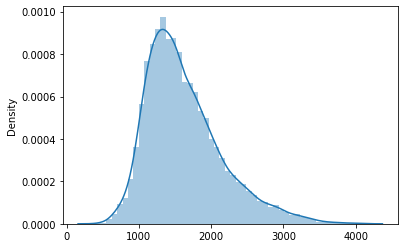

In [78]:
sns.distplot(y_pred)
plt.show()